# Session 4: Data Structuring - data types

In this combined teaching module and exercise set you will be working with structuring data. We will start out with some material about how write [readable code](#Readable-code). Then we will focus on data cleaning, in particular working with pandas data types and new data types:
1. [string  data](#String-data)
1. [categorical data](#Categorical-data)
1. [temporal data](#Temporal-data)
1. [missing data](#Missing-data) and [duplicates](#Duplicated-data)


#### Packages
First load in the required modules and set up the plotting library:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Welcome back to pandas

As mentioned earlier, data structuring skills are necessary to become a great data scientist. There is no way around it. In this video we will motivate why learning to structure data is important (irrespective of the program you use!).

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('XMlCLdzz43w', width=640, height=360)

# Readable code

If we have lots of code it may be very difficult for others or ourselves to read. Therefore, providing some structure and meta text can help reading the code.


## Commenting

When making code it's good practice to document different parts of the code. In particular describing functions and complex code. The example below shows how to make multi-line comments (as a string, which is not assigned) and in-line comments using the `#` character.

```python
def my_fct(x,y):
    ''' 
    Computes the sum of input values (multi-line comment as string)
    '''
    z = x+y # Here we perform the summation (in-line comment)
    return z
```


## Method chaining

We can write multiple operations together by putting them one after the other, which is known as `method chaining`. Using this, we only need to assign them once to a new object and therefore we save a lot of code. We change the example below into one using a method chain:

Example without method chain
```python
df_temp1 = df.loc[selection]
df_temp2 = df_temp1.sort_values(by=X)
df_out = df_temp2.reset_index()
```

Example with method chain - one line

```python
df_out = df.loc[selection].sort_values(by=X).reset_index()
```
As seen in the example, although using less code, our method chain will get more and more difficult to read if we include two or more operations. We can overcome this problem of long chains by splitting into multiple lines with line breaks:

Example with method chain - line break
```python
df_out = df\
        .loc[selection]\
        .sort_values(by=X)\
        .reset_index()
```

Note that the backslash allows us to make a visual line break, but the code is read as one line.


## Weather data structuring - part 2

We continue with the exercise that analyzes NOAA data. The first part was Assignment Part 0.4. The last part will come in Exercise Section 5.2. We start out reviewing what we did in Assignment 0. 

> **Ex. 4.1.1:** The code below runs through all the steps we completed in Assignment 0.4 step by step. Your task is to document this code in your own words. You should also make your own annotation of parts. You should also make the code more readable by applying method chaining.

```python
import pandas as pd

def load_weather(year):
    
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    df_weather = pd.read_csv(url, 
                             header=None)        


    df_weather = df_weather.iloc[:,:4] 
    
    column_names = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather.columns = column_names 
    
    df_weather['obs_value'] = df_weather['obs_value'] / 10 
    
    
    selection_tmax = df_weather.obs_type == 'TMAX'
    df_select = df_weather.loc[selection_tmax]
    
    df_sorted = df_select.sort_values(by=['station', 'datetime'])
    df_reset = df_sorted.reset_index(drop=True)
    df_out = df_reset.copy()
            
    
    return df_out
```

In [3]:
# [Answer to Ex. 4.1.1]

In [9]:
# This is an annotated answer using method chaining

import pandas as pd

def load_weather(year):
    '''
    The input value is an integer.
    This functions loads the data for a selected year and then structures and cleans it. 
    - Structuring includes removing unused columns, renaming and selecting only observations 
    of maximum temperature. 
    - Cleaning includes inserting missing decimal, sorting and resetting index.    
    '''
        
    
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"
    
    # loads the data
    df_weather = pd.read_csv(url, header=None)\
                    .iloc[:,:4] 
    
    # structure and clean data using methods chaining
    df_out = \
        df_weather\
            .rename(columns={0: 'station', 1: 'datetime', 2: 'obs_type', 3: 'obs_value'})\
            .query("obs_type == 'TMAX'")\
            .assign(obs_value=lambda df: df['obs_value']/10)\
            .sort_values(by=['station', 'datetime'])\
            .reset_index(drop=True)\
            .copy() 
    
    return df_out

In [10]:
load_weather(1884)

,station,datetime,obs_type,obs_value
0,AGE00135039,18840101,TMAX,14.4
1,AGE00135039,18840102,TMAX,15.8
2,AGE00135039,18840103,TMAX,16.6
3,AGE00135039,18840104,TMAX,15.6
4,AGE00135039,18840105,TMAX,14.8
...,...,...,...,...
75781,UZM00038457,18841027,TMAX,9.1
75782,UZM00038457,18841028,TMAX,11.1
75783,UZM00038457,18841029,TMAX,13.6
75784,UZM00038457,18841030,TMAX,13.1


# Data types

## String data
We will proceed with learning about processing string data. We have already seen this in Python (session). See the video with a short recap and how we do things in Python.

In [ ]:
YouTubeVideo('bMGRna-iLFM', width=640, height=360)

> **Ex. 4.1.2:** Load the data for year 1864. Extract the area code (country and state) from the station name into a separate column.

> _Hint:_ The station column contains a GHCND ID, given to each weather station by NOAA. The format of these ID's is a 2 letter country/state code, followed by possible additional information on the third character and then an integer identifying the specific station. A simple approach is to assume a fixed length of the country ID. A more complex way would be to use the [`re`](https://docs.python.org/3.8/library/re.html) module. 

In [12]:
# [Answer to Ex. 4.1.2]

In [2]:
# HANDIN

## Categorical data

Watch the video below introducing categorical data and how to work with it.

In [ ]:
YouTubeVideo('qGAYwb8NHPE', width=640, height=360)

> **Ex. 4.1.3:** 
Convert the `area` column to a categorical variable. 
Transform the `obs_value` column from a continuous to a categorical variable by partitioning it into `3` intervals. Call this new column for `obs_value_cat`.  This can be done using the `pd.cut()` method of pandas. 
Make another column with  `obs_value` as a categorical variable but this time label the 3 intervals as `["cold", "medium", "hot"]`. This can be done by specifying the `labels` parameter in the `pd.cut()` method of pandas. Call this new column for `obs_value_cat_labeled`.

In [15]:
# [Answer to Ex. 4.1.3]

In [1]:
# HANDIN

## Temporal data

Our coverage of basic Python did not include time. This is another elementary datatypes, that has its own native structure or maybe converted to an integer using a smart method. See more below.

In [ ]:
YouTubeVideo('BGnxa6mT94g', width=640, height=360)

> **Ex. 4.1.4:** Convert the date formatted as string to datetime. Call this column `datetime_dt`. Make a new column named `month` with the month for each observation. Set the datetime variable as temporal index. 

> Hint: Look up `.set_index()` setting the index.

In [18]:
# [Answer to Ex. 4.1.4]

In [19]:
# datetime column
df['datetime_dt'] = pd.to_datetime(df['datetime'], format = '%Y%m%d')

# month column
df['month'] = df.datetime_dt.dt.month

# set datetime index
df = df.set_index('datetime_dt')

df.head()

,station,datetime,obs_type,obs_value,area,obs_value_cat,obs_value_cat_labeled,month
datetime_dt,,,,,,,,
1864-01-02,AGE00135039,18640102,TMAX,14.0,AG,"(12.6, 35.9]",hot,1
1864-01-04,AGE00135039,18640104,TMAX,9.0,AG,"(-10.7, 12.6]",medium,1
1864-01-05,AGE00135039,18640105,TMAX,9.5,AG,"(-10.7, 12.6]",medium,1
1864-01-06,AGE00135039,18640106,TMAX,11.5,AG,"(-10.7, 12.6]",medium,1
1864-01-07,AGE00135039,18640107,TMAX,12.5,AG,"(-10.7, 12.6]",medium,1


> **Ex. 4.1.5:** Update your annotated function above with processing of area and temporal data.          

In [20]:
# [Answer to Ex. 4.1.5]

In [21]:
def load_weather(year):
    '''
    This functions loads the data for selected year and then structures and cleans it.
    - Structuring includes removing unused columns, renaming and selecting only observations 
    of maximum temperature. 
    - Cleaning includes inserting missing decimal, sorting and resetting index as well as
    processing temporal and spatial information.
    '''
        
    
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"
    
    # loads the data
    df_weather = pd.read_csv(url, header=None)\
                    .iloc[:,:4] 
    
    # structure and clean data using methods chaining
    df_out = \
        df_weather\
            .rename(columns={0: 'station', 1: 'datetime', 2: 'obs_type', 3: 'obs_value'})\
            .query("obs_type == 'TMAX'")\
            .assign(obs_value=lambda df: df['obs_value']/10)\
            .sort_values(by=['station', 'datetime'])\
            .reset_index(drop=True)\
            .copy() 
    
    # area process
    df_out['area'] = df_out['station'].str[0:2]
    
    #categorical 
    df.area = df.area.astype('category')
    df['obs_value_cat'] = pd.cut(df.obs_value, 3)
    df['obs_value_cat_labeled'] = pd.cut(df.obs_value, 3,
                                         labels=["cold", "medium", "hot"])
    
    # datetime process
    df_out['datetime_dt'] = pd.to_datetime(df_out['datetime'], format = '%Y%m%d')
    df_out = df_out.set_index('datetime_dt')
    
    return df_out

> **Ex. 4.1.6:** Make a timeseries plot for the stations called `AU000005901`.

> _Hint:_ for this you need to know a few methods of the pandas Series objects. `.plot()`. 

In [22]:
# [Answer to Ex. 4.1.6]

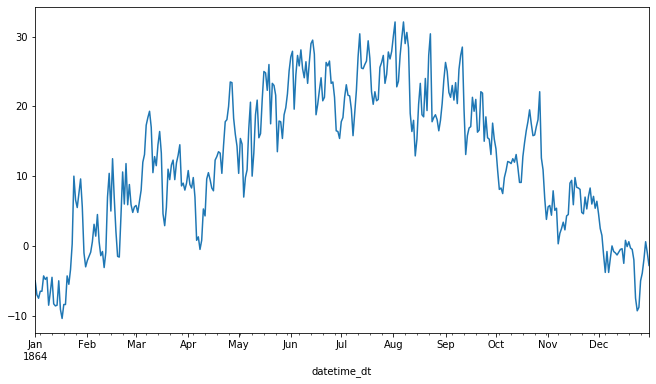

In [23]:
df\
    .query('station=="AU000005901"')\
    .obs_value\
    .plot(figsize=[11,6])

plt.show()

##  Working with US census data

In this section we will use [this dataset](https://archive.ics.uci.edu/ml/datasets/Adult) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html) to practice some basic operations on pandas dataframes. 


> **Ex. 4.2.1:** This link `'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'` leads to a comma-separated file with income data from a US census. Load the data into a pandas dataframe and show the 25th to 35th row.

> _Hint #1:_ There are no column names in the dataset. Use the list `['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']` as names. 

> _Hint #2:_ When you read in the csv, you might find that pandas includes whitespace in all of the cells. To get around this include the argument `skipinitialspace = True` to `read_csv()`. 

In [24]:
# [Answer to Ex. 4.2.1]

In [25]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
head = ['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 
        'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 
        'hours_per_week', 'native_country', 'wage']

df2 = pd.read_csv(url,
                 sep = ',',
                 skipinitialspace = True,      # Removes whitespace
                 names = head,
                 index_col = False             # dont use 'age' as the index (!)
                )
df2.iloc[24:35]

,age,workclass,fnlwgt,educ,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
29,49,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,<=50K
31,20,Private,266015,Some-college,10,Never-married,Sales,Own-child,Black,Male,0,0,44,United-States,<=50K
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K
33,30,Federal-gov,59951,Some-college,10,Married-civ-spouse,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K


##  Missing data

Often our data having information missing, e.g. one row lacks data on education for a specific person. Watch the video below about missing data type and get some simple tools to deal with the problem.

In [ ]:
YouTubeVideo('GDaxQig-qCU', width=640, height=360)

> **Ex. 4.2.2:** What is the missing value sign in this dataset? Replace all missing values with NA's understood by pandas. Then proceed to drop all rows containing any missing values with the `dropna` method. How many rows are removed in this operation?

> _Hint 1:_ if this doesn't work as expected you might want to take a look at the hint for 4.2.1 again.
 
> _Hint 2:_ The NaN method from NumPy might be useful

In [27]:
# [Answer to Ex. 4.2.2]

In [28]:
# The data uses '?' for NA's. To replace them we can simply run 
from numpy import NaN

df2_clean = \
    df2.replace('?', NaN)\
      .dropna()

print(f"We have dropped {len(df2) - len(df2_clean)} rows")

We have dropped 2399 rows


##  Duplicated data

Watch the video below about duplicated data - in particular duplicated rows and how to handle them.

In [ ]:
YouTubeVideo('BLLQofon9Ug', width=640, height=360)

> **Ex. 4.2.3:** Determine whether or not duplicated rows is a problem in the NOAA weather data and the US census data in the module. You should come up with arguments from the structure of the rows. 

In [30]:
# [Answer to Ex. 4.2.3]

In [31]:
# Duplicates is not a problem in the first dataset. 
# In the second there are duplicates, but it's most likely that they are identical 
# in terms of these observed characteristics but they refer to different individuals.

n_duplicates_1 = df.duplicated(['station','datetime']).sum()
n_duplicates_2 = df2.duplicated().sum()
print(f'Number of duplicates in the datasets are respectively: {n_duplicates_1, n_duplicates_2}')

Number of duplicates in the datasets are respectively: (0, 24)


##  Summary of data types

Watch the video below where we conclude the lecturing material for this teaching module.

In [ ]:
YouTubeVideo('mohBV7crmsU', width=640, height=360)

##  Additional exercises

> **_Note_**: to solve the bonus exercises below, you will need to apply the `.groupby()` method a few times. This has not yet been covered in the lectures (you will see it in on of the next lectures).  
>
> `.groupby()` is a method of pandas dataframes, meaning we can call it like so: `data.groupby('colname')`. The method groups your dataset by a specified column, and applies any following changes within each of these groups. For a more detailed explanation see [this link](https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm). The [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) might also be useful.


> **Ex. 4.2.4:** (_Bonus_) Is there any evidence of a gender-wage-gap in the data? Create a table showing the percentage of men and women earning more than 50K a year.

In [28]:
# [Answer to Ex. 4.2.4]

In [19]:
# first we create a dummy for earning more than 50K
df2_clean['HighWage'] = (df2_clean['wage'] == '>50K').astype(int)
# then group by sex and calculate the mean
df2_clean[['sex', 'HighWage']]\
        .groupby('sex')\
        .mean()

,HighWage
sex,
Female,0.113678
Male,0.313837


> **Ex. 4.2.5:** (_Bonus_) Group the data by years of education (`educ_num`) and marital status. Now plot the share of individuals who earn more than 50K for the two groups 'Divorced' and 'Married-civ-spouse' (normal marriage). Your final result should look like this: 

![](examplefig.png)

> _Hint:_ remember the `.query()` method is extremely useful for filtering data.

In [30]:
# [Answer to Ex. 4.2.5]

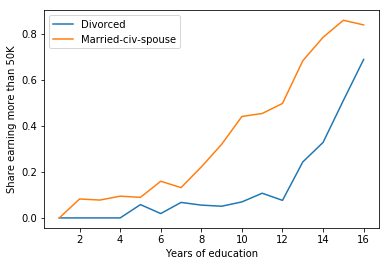

In [93]:
df2_clean[['marital_status', 'HighWage', 'educ_num']]\
        .groupby(['marital_status', 'educ_num'])\
        .mean()\
        .reset_index()\
        .query("marital_status == 'Divorced' | marital_status == 'Married-civ-spouse'")\
        .set_index('educ_num')\
        .groupby('marital_status')\
        .HighWage\
        .plot()

plt.xlabel('Years of education')
plt.ylabel('Share earning more than 50K')
plt.legend()